# Tutorial 5: CCA with synthetic data

In [37]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from mpl_toolkits.mplot3d import Axes3D

In [29]:
#load synthetic data and create x, y datasets which we will analyze
data = pd.read_csv('Tutorial5_input_data.csv',header=None)
n1,n2 = np.shape(data)
xdata = data.iloc[:,:3] #xdata has three variables, 460 observations
ydata = 2*data.iloc[:,[3,0]]  #ydata has two variables, 460 observations
t = range(n1)


In [30]:
#rotate ydata by theta

theta = -30 * 2 * np.pi / 360
R = [[np.cos(theta), np.sin(theta)] , [-np.sin(theta), np.cos(theta)]]

ydata = R @ ydata.T
ydata = ydata.T

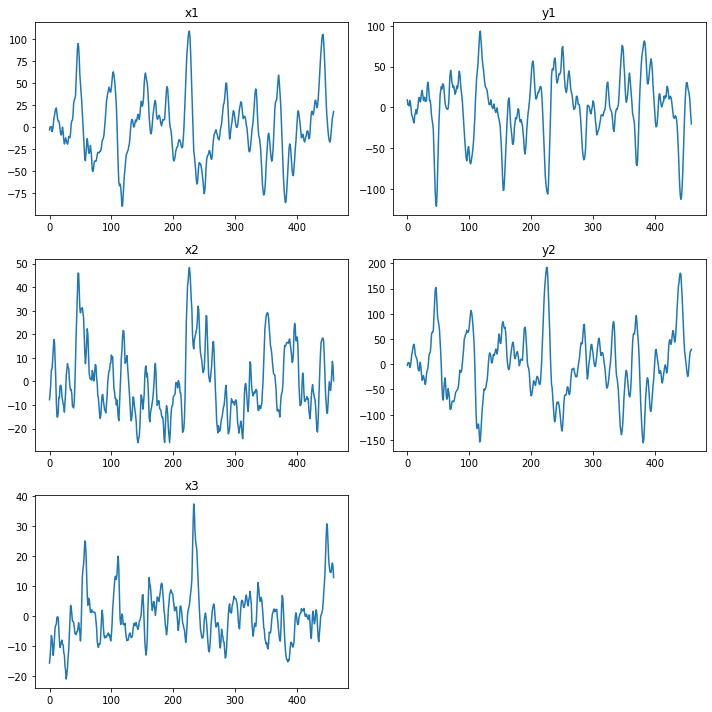

In [33]:
#plot the timeseries for each variable

plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
plt.plot(xdata[0])
plt.title('x1')

plt.subplot(3,2,3)
plt.plot(xdata[1])
plt.title('x2')

plt.subplot(3,2,5)
plt.plot(xdata[2])
plt.title('x3')

plt.subplot(3,2,2)
plt.plot(ydata[0])
plt.title('y1')

plt.subplot(3,2,4)
plt.plot(ydata[1])
plt.title('y2')

plt.tight_layout()
plt.show()

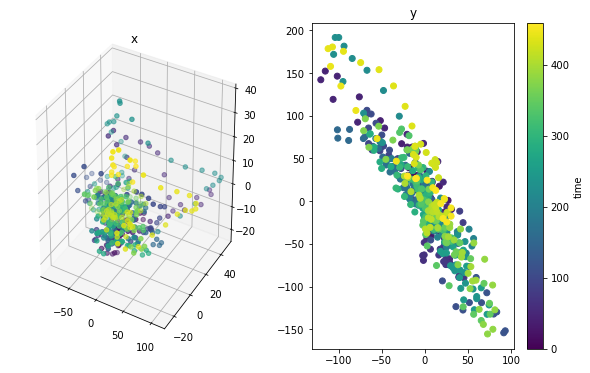

In [54]:
#plot scatterplots for x and y 

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(121,projection='3d')
ax.scatter(xdata[0],xdata[1],xdata[2],c=t)
plt.title('x')

ax = fig.add_subplot(122)
p = ax.scatter(ydata[0],ydata[1],c=t)
plt.title('y')
cbar = fig.colorbar(p)
cbar.set_label('time')

Now, let's do CCA!

In [55]:
n_modes = 2 #modes to keep
cca = CCA(n_components=n_modes,max_iter = 10000)
U,V = cca.fit_transform(xdata,ydata)
A = cca.x_weights_
B = cca.y_weights_
F = np.cov(xdata.T)@A
G = np.cov(ydata.T)@B
r = [np.corrcoef(U[:,ii],V[:,ii]) for ii in range(n_modes)]

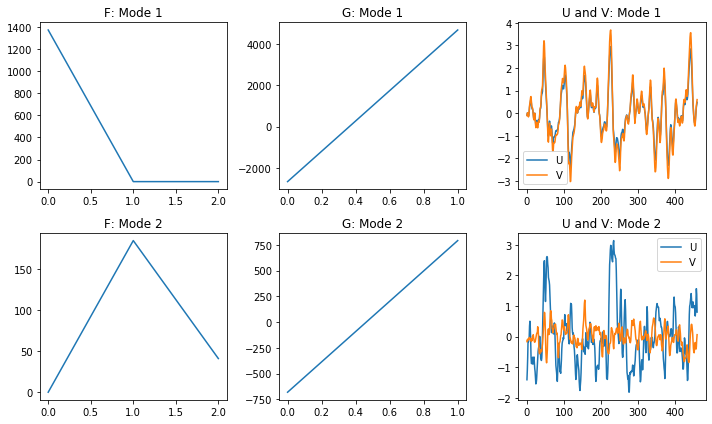

In [67]:
#visualize results

plt.figure(figsize=(10,6))

for kk in range(n_modes):
    
    plt.subplot(2,3,kk*3+1)
    plt.plot(F[:,kk])
    plt.title('F: Mode ' + str(kk+1))
    
    plt.subplot(2,3,kk*3+2)
    plt.plot(G[:,kk])
    plt.title('G: Mode ' + str(kk+1))
    
    plt.subplot(2,3,kk*3+3)
    plt.plot(U[:,kk])
    plt.plot(V[:,kk])
    plt.title('U and V: Mode ' + str(kk+1))
    plt.legend(['U','V'])
    
plt.tight_layout()
plt.show()